In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt

In [41]:
from os.path import dirname, join
from pathlib import Path
ROOT_DIR = dirname(os.path.abspath('ARCH7211-SPRING2021')) # This is your Project Root
data_PATH = join(ROOT_DIR,"data","room_info.csv")  # requires `import os`

# input data
data = pd.read_csv(r'C:\Users\milad\Documents\GitHub\arch7211-spring2021\data\room_info.csv')

In [39]:
data.head()

,path,type,classes,floor_index,num_sides,area,proportion_floor_area,perimeter,compactness,num_adjacent_walls,...,contains_ShowerScreen,contains_Sink,contains_SpaceForAppliance,contains_Stove,contains_Toilet,contains_TumbleDryer,contains_Urinal,contains_WallCabinet,contains_WashingMachine,contains_WaterTap
0,/Users/Nicholas/Desktop/cubicasa5k/high_qualit...,Entry,Entry Lobby,0,8,56159.9318,0.058254,1166.86,0.518321,12,...,0,0,0,0,0,0,0,0,0,0
1,/Users/Nicholas/Desktop/cubicasa5k/high_qualit...,Utility,Utility Laundry,0,8,45361.5082,0.047053,1006.82,0.562333,8,...,0,0,0,0,0,0,0,1,0,0
2,/Users/Nicholas/Desktop/cubicasa5k/high_qualit...,Kitchen,Kitchen,0,6,73772.9501,0.076524,1139.34,0.714168,5,...,0,1,0,1,0,0,0,1,0,0
3,/Users/Nicholas/Desktop/cubicasa5k/high_qualit...,LivingRoom,LivingRoom,0,4,286664.8762,0.297355,2165.54,0.768160,4,...,0,0,0,0,0,0,0,0,0,0
4,/Users/Nicholas/Desktop/cubicasa5k/high_qualit...,Bedroom,Bedroom,0,6,96086.0375,0.099669,1262.44,0.757615,6,...,0,0,0,0,0,0,0,0,0,0


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61394 entries, 0 to 61393
Columns: 110 entries, path to contains_WaterTap
dtypes: float64(5), int64(99), object(6)
memory usage: 51.5+ MB


In [60]:
#Clean input data from the target data
# define features and predictions
X = data.drop(['path','type','classes','open_to','door_to','contains'], axis =1)
y = data['type']
#Split the data into training data, and test data 
X_train , X_test, y_train, y_test = train_test_split(X,y, test_size= 0.3)

In [61]:
#import random forest and metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
# Instanciate randomforest classifier 
rfc = RandomForestClassifier(n_estimators= 400)

In [62]:
# train model 
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [63]:
# predict
rfc_pred = rfc.predict(X_test)

In [64]:
# Evaluate model
print( confusion_matrix(y_test,rfc_pred))
print('\n')
print( classification_report(y_test,rfc_pred))

[[  17    0    0    0    1    0    2    0    3    0    0    0    1    0
     0    0    0    0    0    0    0    0    0    0    1    0   14    0
     0]
 [   0    8    0    0    4    0    1    0    0    0    0    1    0    0
     0    0    0    0    0    0    2    0    0    0    0    0   12    4
     0]
 [   0    0    0    1    0    0    1    0    0    0    0    0    1    0
     0    0    0    0    0    0    0    0    0    0    2    0    6    1
     0]
 [   0    0    0 2037    1    0   15    0    0    1    8    0    1    0
     0    1    0    0    0    0    2    0    0    0    6    1   66    2
     7]
 [   2    0    0    0 2221    0    2    1    4    0    1    1    8    2
     0    2    0   32    0    0    7    0   14    0   13    0   42    1
     0]
 [   0    0    0    0    0   42    0    0    0    0    0    0    0    9
     0    0    0    0    0    0   38    0    0    0    0    0    0    1
     0]
 [   1    0    0    7    8    0  669    0    0    4    1    0    3    1
     0    0    0

29


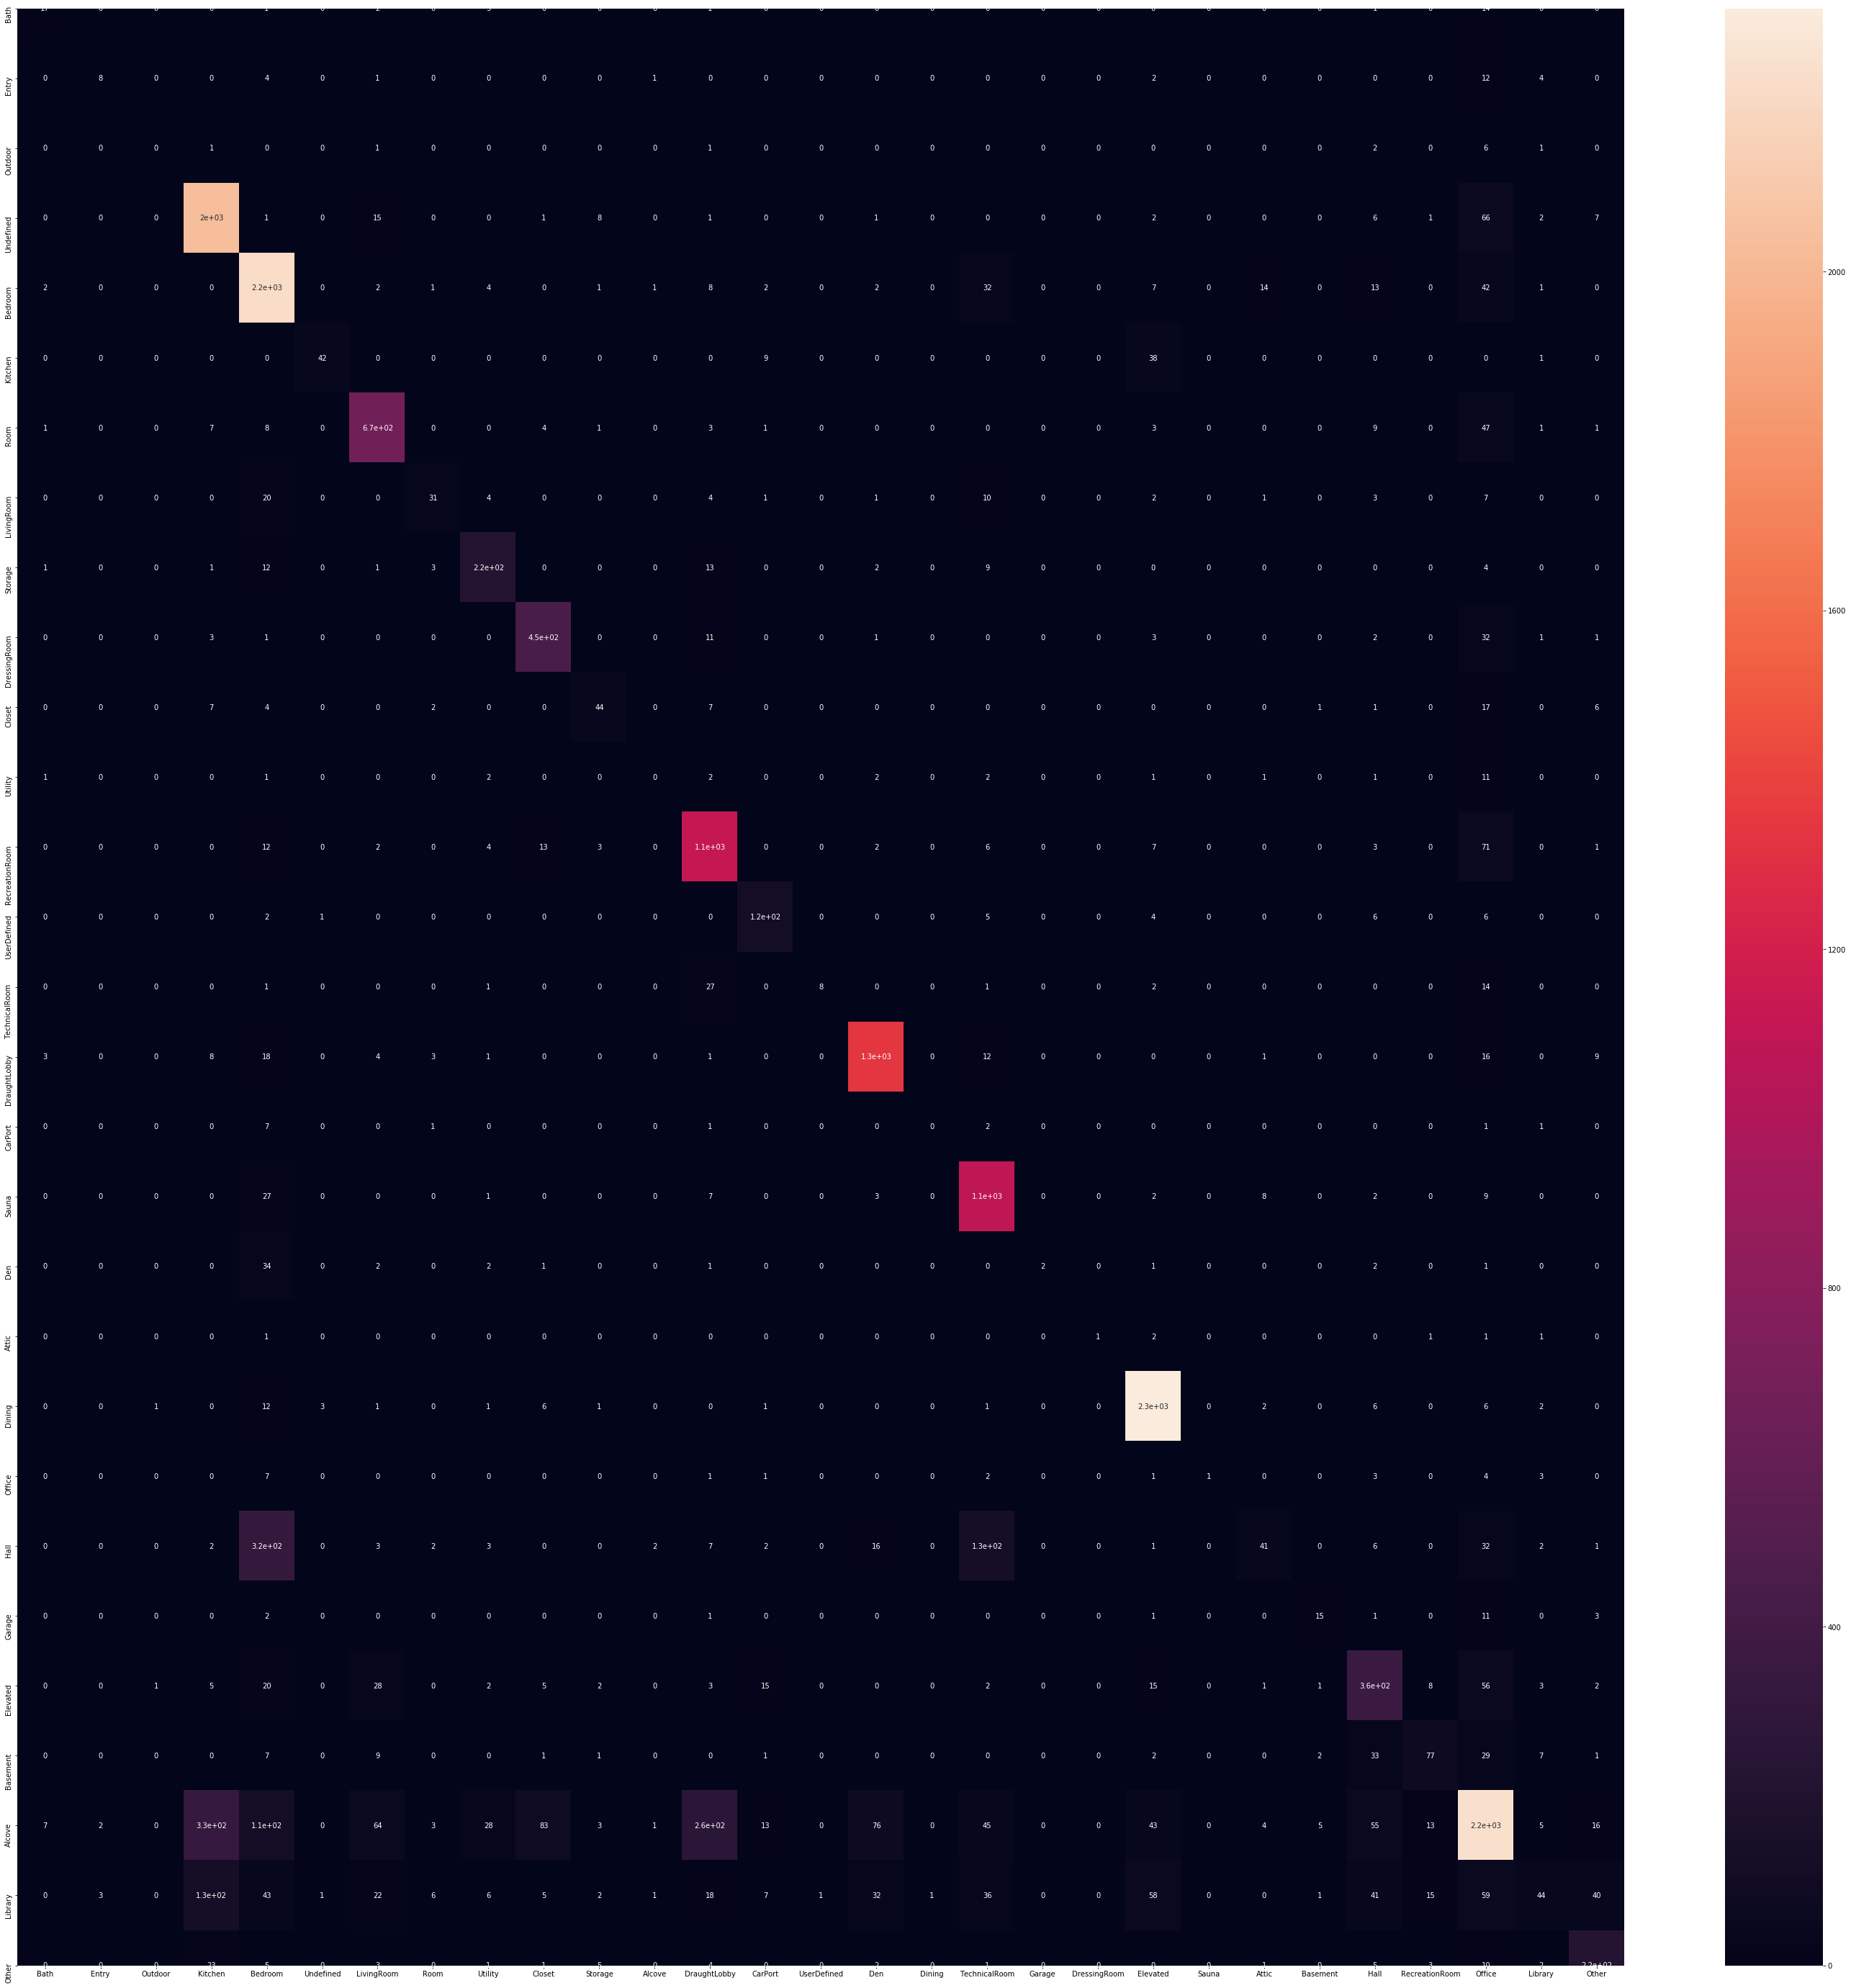

In [71]:
cMat = confusion_matrix(y_test,rfc_pred)
print(len(y_test.unique()))
df_cm = pd.DataFrame(data = cMat , index= pd.Series(y_test).unique() , columns= pd.Series(rfc_pred).unique())
# df_cm = pd.DataFrame(data = cMat)
df_cm.head()
plt.figure(figsize= (50,50))
sn.heatmap(df_cm, annot=True)

In [74]:
print(len(data.type.unique()))
data.type.unique()

29


array(['Entry', 'Utility', 'Kitchen', 'LivingRoom', 'Bedroom', 'Bath',
       'Undefined', 'Closet', 'DraughtLobby', 'Outdoor', 'Dining',
       'Garage', 'UserDefined', 'DressingRoom', 'TechnicalRoom', 'Room',
       'Sauna', 'Storage', 'Office', 'CarPort', 'Attic', 'Hall', 'Other',
       'Den', 'Alcove', 'Basement', 'Elevated', 'Library',
       'RecreationRoom'], dtype=object)

In [88]:
newDF = data[data.type != 'Undefined']
newDF = newDF[newDF.type != 'UserDefined']

In [89]:
newDF.shape

(48533, 110)

In [80]:
data.shape

(61394, 110)

In [90]:
#Clean input data from the target data
# define features and predictions
X = newDF.drop(['path','type','classes','open_to','door_to','contains'], axis =1)
y = newDF['type']
#Split the data into training data, and test data 
X_train , X_test, y_train, y_test = train_test_split(X,y, test_size= 0.3)

In [91]:
#import random forest and metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
# Instanciate randomforest classifier 
rfc = RandomForestClassifier(n_estimators= 400)

In [92]:
# train model 
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [93]:
# predict
rfc_pred = rfc.predict(X_test)

In [94]:
# Evaluate model
print( confusion_matrix(y_test,rfc_pred))
print('\n')
print( classification_report(y_test,rfc_pred))

[[  32    0    0    0    9    0    6    0    6    0    0    0    6    0
     0    0    0    0    0    0    1    0    0    0    1    0    0]
 [   0    8    0    0    5    0    2    0    0    0    0    0    0    0
     0    0    0    1    0    0    5    0    1    0    7    0    0]
 [   0    0    2    1    0    0    0    0    0    0    1    0    1    0
     0    0    0    0    0    0    2    0    0    0    5    0    0]
 [   0    0    0 2105    6    0   17    0    0    1    5    0    6    0
     0    0    0    0    0    0    3    0    0    2   10    2   10]
 [   2    0    0    2 2244    0    2    1    6    0    0    1   11    3
     0    3    0   29    1    0   18    0   19    0   19    0    0]
 [   0    0    0    0    0   51    0    0    0    0    0    0    0    6
     0    0    0    0    0    0   34    0    0    0    0    0    0]
 [   1    1    0   17    8    0  743    0    1    3    1    0    5    0
     0    0    0    0    0    0    2    0    0    0   22    1    1]
 [   0    0    0    